# Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Columns: 882 entries, PubchemFP0 to pIC50
dtypes: float64(1), int64(881)
memory usage: 31.6 MB


In [5]:
X= df.drop("pIC50", axis= 1)
y= df["pIC50"]

In [ ]:
X.shape

(4695, 881)

In [6]:
# 881 features! reduce the amount of feature by removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

# threshold calculation: 0.8 * 0.2 = 0.16,

In [7]:
X.shape

## 744 features removed --> further understand the set threshold!

(4695, 137)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## Building a Regression Model using RF

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
print(f"R^2 score: {r2}")

R^2 score: 0.509878910176949


In [10]:
y_pred = model.predict(X_test)

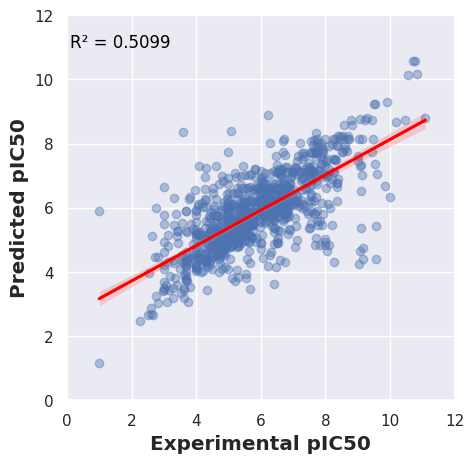

In [11]:
sns.set(color_codes=True)

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

ax.text(0.1, 11, f'R² = {r2:.4f}', fontsize=12, color='black', ha='left')

plt.show()


## Compare models performance using lazypredict

In [12]:
!pip install lazypredict

In [13]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(verbose= 0, ignore_warnings=True, custom_metric= None)
models_train, predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [01:08<00:01,  1.02s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [01:09<00:00,  1.65s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:51<00:00,  1.35it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [00:51<00:00,  1.23s/it]


In [14]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.86,0.86,0.57,0.16
DecisionTreeRegressor,0.86,0.86,0.57,0.34
ExtraTreesRegressor,0.86,0.86,0.57,8.44
GaussianProcessRegressor,0.86,0.86,0.57,7.47
RandomForestRegressor,0.82,0.83,0.64,5.94
XGBRegressor,0.82,0.83,0.65,0.40
BaggingRegressor,0.80,0.81,0.67,1.94
MLPRegressor,0.76,0.77,0.75,8.06
HistGradientBoostingRegressor,0.67,0.69,0.87,1.02


In [15]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,1.22
RandomForestRegressor,0.44,0.52,1.08,5.16
LGBMRegressor,0.44,0.52,1.08,0.34
XGBRegressor,0.44,0.52,1.08,0.34
BaggingRegressor,0.41,0.49,1.11,0.54
NuSVR,0.39,0.48,1.12,2.25
SVR,0.39,0.48,1.12,2.01
KNeighborsRegressor,0.37,0.46,1.14,0.12
MLPRegressor,0.36,0.45,1.15,8.82


[(0.0, 1.0)]

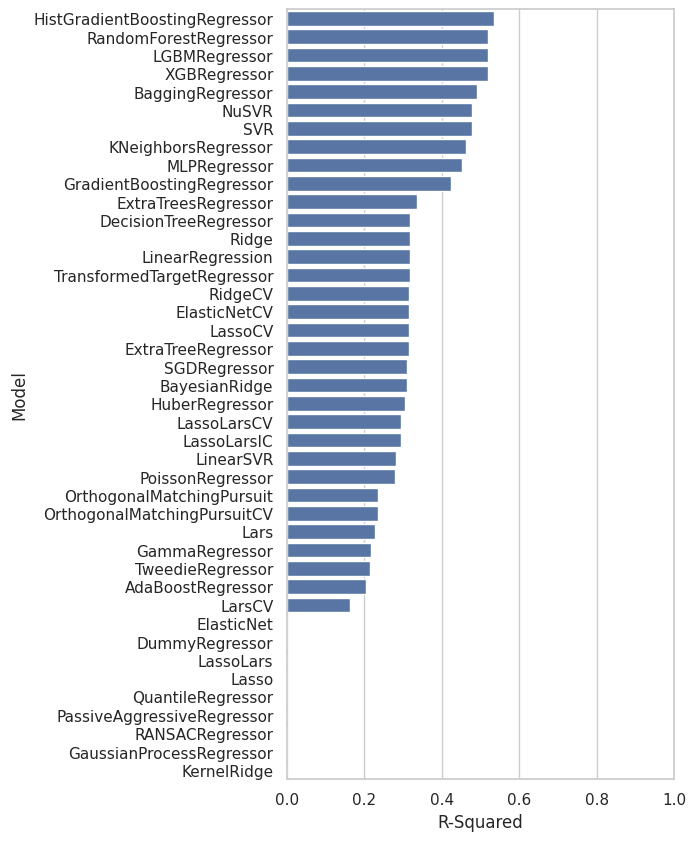

In [18]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

In [19]:
# safe model

import joblib

joblib.dump(model, "random_forest_model.pkl")

['random_forest_model.pkl']